# Data Science 2 (modeling)

## Computer-exam BFVM19DATASC2 - Numerical Analysis

### 2020-2021 - 1st opportunity, Fri. 19 Mar 2021, 16:00-17:30, ZP11/H1.86

**Instructions:**

Provide your answers in the code cells corresponding with each of the questions. For those questions that require a textual answer rather than python code, you may either type your answer in the cell using a python comment, or insert a new markdown cell with your text. All questions have the possible number of points to be scored indicated. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

You can receive partial credit on textual answers as well as code if you don't get the whole right answer. Explain your code through commenting, even if it doesn't work correctly. On your computer desktop you will find all data files and supplementary materials. All notes, textbooks and other written reference materials are permitted.

<div class="alert alert-warning">
<b>After finishing:</b>
<ol><li>
Rename your notebook with your name and student number, like `JohnDoe_123456`, using the menu option `File` > `Rename`.
</li><li>
Evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors.
</li><li>
Save the evaluated notebook using the menu option `File` > `Save and Checkpoint`.
</li><li>
Open a terminal, change to the desktop folder using `cd ~/Desktop`, and type `submit_your_work --help` to get help on submit script usage.
</li><li>
Submit your file using a syntax like `submit_your_work 123456 JohnDoe_123456.ipynb`.
</li></ol>
</div>

***

**Chronobiology** is a field of biology that examines timing processes, including periodic (cyclic) phenomena in living organisms, such as their adaptation to daily (circadian) rhythms. In mammals, the hormones cortisol and melatonin play important roles in regulating circadian cycles, for example in relation to body temperature.

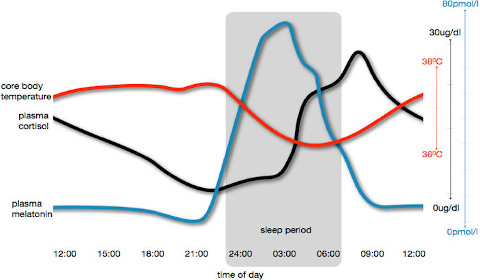
<small>*Image source: [Hickie et al. 2013](https://dx.doi.org/10.1186/1741-7015-11-79)*</small>

Normally, the body is constantly correcting its circadian cycle on the basis of daylight, among other things. However, in the absence of such external clues, it still maintains a similar rhythm. The period of the spontaneous fluctuations may deviate from 24 hours, however. In the following questions, you will determine the period of the human circadian clock in the absence of input from the environment on the basis of a simplified model.

In [247]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

### Question 1

The interactions between cortisol and melatonin can be modeled by a pair of coupled ordinary differential equations. *Ralston's method* (see also p.254 of Ch.7 in Kiusalaas' textbook) is an integration method from the Runge-Kutta family that is fully characterized by the coefficients in the third row of the following table:

| Method | Order | $\boldsymbol{c}$ | $\boldsymbol{q}$ |
| :-- | :-: | :-: | :-: |
| Euler's | 1 | $1$ | $\times$ |
| Heun's | 2 | $\frac{1}{2}$, $\frac{1}{2}$ | $1$ |
| Ralston's | 2 | $\frac{1}{3}$, $\frac{2}{3}$ | $\frac{3}{4}$ |
| Runge-Kutta's | 4 | $\frac{1}{6}$, $\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{6}$ | $\begin{array}{ccc} \frac{1}{2} & & \\ 0 & \frac{1}{2} & \\ 0 & 0 & 1 \end{array}$ |

#### Question 1a <small>[5 pts]</small>

Ralston's method is listed as a second-order method. Explain in your own words what it means for a method to be of order 2.

In [ ]:
# ANSWER HERE

#### Question 1b <small>[10 pts]</small>

Complete the following function `ralston()` that integrates the first-order differential equation $\frac{\text{d}}{\text{d}t}\boldsymbol{y} = \boldsymbol{f}(t, \boldsymbol{y})$ from a starting value $\boldsymbol{y}(0)$ at $t=0$ to an end value $\boldsymbol{y}(t)$ for some `t` that is supplied by the user. Design your function such that it uses a step size that is *close to* a value `h` supplied by the user but that fits an integer number of times into the interval from $0$ to $t$! This function should return only one `numpy` vector containing the estimated value $\boldsymbol{y}(t)$.

In [248]:
def ralston(f, y0, t, h):
    """y = ralston(f, y0, t, h).
    Ralston's method for solving the initial
    value problem {y}' = {f(t,{y})} from t=0,
    where {y} = {y[0],y[1],...,y[n-1]}.
    f      = user-supplied function that returns the
             array f(t,y) = {y’[0],y’[1],...,y’[n-1]}.
    y0     = initial value for y
    t      = terminal value of t
    h      = approximate step size (may be adjusted to
             exactly subdivide the interval (0,t))
    """
    steps = ...
    h = ...
    for ...:
        ...
        y0 = y0 + ...
    return y0

SyntaxError: invalid syntax (2116158116.py, line 15)

In [249]:
def ralston(f, y0, x0, x1, h):
    """y = ralston(f, y0, t, h)"""
    
    steps = int((x1 - x0) / h)
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys =[y]
    for x in xs[:-1]:
        #Initial calculation
        k1 = f(x, y)
        # Middle calculations
        k2 = f(x + ((3*h)/4), y + ((3*h)/4)*k1)

        
        
        y = y + (k1*(1/3) + k2*(2/3))*h
        ys.append(y)
    return ys

#### Question 1c <small>[5 pts]</small>

Define a function `circadian(t, y)` that describes the circadian differential equation model, where $\boldsymbol{y}(t) = \left[ C(t), M(t) \right]^T$ contains the measurable blood plasma concentrations of cortisol $C(t)$ and melatonin $M(t)$ as a function of time $t$:

$$
\left\{
\begin{aligned}
\frac{\text{d}C}{\text{d}t} &= +\tfrac{1}{7} \cdot C \cdot \ln \left( M \right)
\\
\frac{\text{d}M}{\text{d}t} &= -\tfrac{1}{2} \cdot M \cdot \ln \left( C \right)
\end{aligned}
\right.
$$

Time is measured in *hours*; the plasma concentrations are expressed in *arbitrary units* relative to equilibrium (i.e. a static state $M(t)=C(t)=1$ is a solution of these equations).

In [250]:
import math
def circadian(t, y):
    
    return np.array([
        (1/7)*y[0]*np.log(y[1]),
        (-1/2)*y[1]*np.log(y[0])
    ])

Your functions can now be combined to determine the cortisol- and melatonin levels according to the model at any time point $t$. We start from initial values $C(0) = 1.5$ a.u. and $M(0) = 0.5$ a.u. and use a step size of a quarter hour, as follows.

<div class="alert alert-danger">
If you did not succeed in solving the previous question, then use the alternative model definition below to continue.
</div>

In [295]:
def model(t):
    return ralston(circadian, np.array([1.5, 0.5]), 0,  72, 0.25) 

# Only uncomment the following line if you did not succeed in solving question 1!
# model = lambda t: np.array([np.exp(-0.5*np.sin(t/4)), np.exp(-np.cos(t/4))])

In [293]:
# def corti_level(t):
#     corti = []
#     for i in range(len(ralston(circadian, np.array([1.5, 0.5]), 0,  72,0.25))):
#         corti.append(ralston(circadian, np.array([1.5, 0.5]), 0,  72,0.25)[i][0])
#     return corti


### Question 2

We plot the spontaneous fluctuations in cortisol and melatonin according to the model across three days (i.e. 72 hours). The period of the oscillations is close to but not exactly equal to 24 hours.

In [270]:
t = np.linspace(0, 72, 289)
ys = model(t)


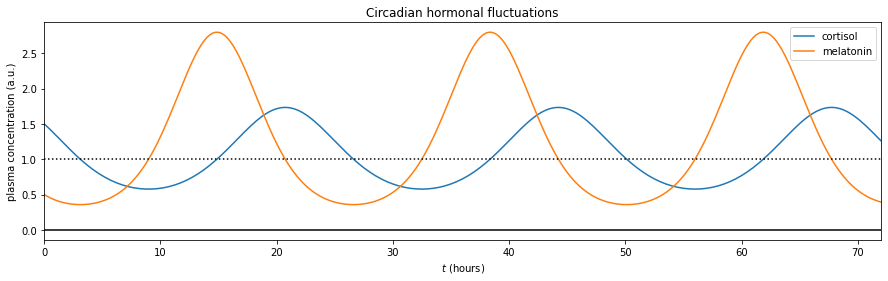

In [279]:
plt.figure(figsize=(15, 4))
plt.plot(t, ys, '-')

plt.axhline(0.0, color='k'); plt.axhline(1.0, color='k', ls=':')
plt.xlabel('$t$ (hours)'); plt.ylabel('plasma concentration (a.u.)'); plt.title('Circadian hormonal fluctuations')
plt.xlim(0, 72); plt.legend(['cortisol', 'melatonin'])
plt.show()

#### Question 2a <small>[10 pts]</small>

One way of determining the period $T$ of the fluctuations is by determining the time difference between consecutive minima or maxima.

Roughly bracket two consecutive minima/maxima, and then use *golden section search* to improve the accuracy of the estimates. What is the period of the fluctuations, expressed in hours, with an accuracy of 3 decimals? (You may use the cortisol- or melatonin-curve, as you prefer.)

In [288]:
# def corti(t):
#     return np.exp(-np.cos(t/4))
x = np.linspace(0, 100, 501)

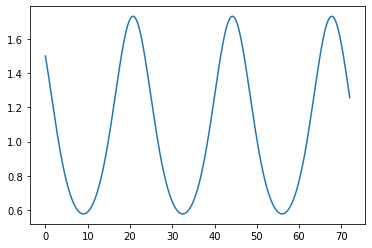

In [294]:
plt.plot(t, corti_level(t))
plt.show()

In [236]:
def golden_search(f, a, b, tol=1e-8):
    """minimum = golden_search(f, a, b, tol=...).
    Finds a minimum of the function f using golden
    section search, starting from bracketing values
    a and b and ending when |b-a| < tol.
    """
    
    factor = (3.0 - np.sqrt(5.0)) / 2.0

    x1 = a + factor * (b - a)
    x2 = b - factor * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    while abs(b-a) > tol:
        if f1 < f2: # if operant '>' algo finds maxima else finds minimum
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + factor * (b - a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 =  b - factor * (b - a)
            f2 = f(x2)
            
            
    return (a + b) / 2.0

In [235]:
def minimumsearch(f, a, b, steps):
    """lo, hi = minimumsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the minima of f(x).
    """
    if steps < 2:
        steps = 2
    h = (b- a) / steps
    lo = a
    md = a + h 
    f_lo = f(lo)
    f_md = f(md)
    for i in range(2, steps +1):
        hi = a + h * i
        f_hi = f(hi)
        
        if f_md < f_lo and f_md <= f_hi:
            yield lo, hi
            
        lo, f_lo = md, f_md    
        md, f_md= hi, f_hi
   

In [299]:
model(60)

[array([1.5, 0.5]),
 array([1.46196837, 0.47605182]),
 array([1.42249105, 0.45475694]),
 array([1.38190794, 0.43594732]),
 array([1.34054951, 0.41946919]),
 array([1.29873254, 0.40518388]),
 array([1.25675658, 0.3929682 ]),
 array([1.21490096, 0.38271464]),
 array([1.1734227 , 0.37433149]),
 array([1.13255499, 0.36774273]),
 array([1.09250635, 0.36288799]),
 array([1.05346038, 0.35972242]),
 array([1.01557609, 0.35821658]),
 array([0.97898861, 0.35835634]),
 array([0.94381034, 0.36014286]),
 array([0.91013235, 0.36359258]),
 array([0.87802605, 0.36873727]),
 array([0.847545  , 0.37562412]),
 array([0.81872679, 0.38431581]),
 array([0.79159497, 0.39489067]),
 array([0.766161  , 0.40744271]),
 array([0.7424261, 0.4220817]),
 array([0.72038306, 0.43893303]),
 array([0.70001791, 0.45813747]),
 array([0.68131149, 0.47985073]),
 array([0.6642409 , 0.50424264]),
 array([0.64878081, 0.53149599]),
 array([0.63490461, 0.56180489]),
 array([0.62258545, 0.59537255]),
 array([0.61179715, 0.63240833

In [297]:
list(minimumsearch(model, 1, 60, 1000))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

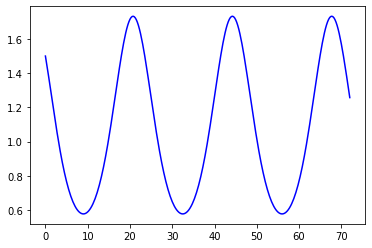

In [296]:
plt.plot(t , corti_level(t), '-b')


for (lo, hi) in list(minimumsearch(model, 1, 60, 1000)):
    xmin = golden_search(corti_level,lo, hi, 1e-10)
    ymin = corti(xmin)
    plt.plot(xmin, ymin, 'or')
    plt.text(xmin, ymin, f'({xmin:.3f}, {ymin:.3f})', verticalalignment='top')
    print(xmin)


plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')
# plt.axis([-1, 1, -0.1, 1])
plt.show()

In [238]:
T = 50.265 - 25.133
print(T)

25.132


#### Question 2b <small>[10 pts]</small>

Another way of determining the period $T$ of the fluctuations is by determining the difference between two times where the curve traverses the dotted line $y=1$ in the same direction (i.e. upwards or downwards).

Roughly bracket two consecutive such traversals, and then use the *secant method* to improve the accuracy of the estimates. What is the period of the fluctuations, expressed in hours, with an accuracy of 3 decimals? (You may use the cortisol- or melatonin-curve, as you prefer.)

In [239]:
def corti(t):
    return np.exp(-np.cos(t/4)) -1

In [240]:
def secant(f, a, b, tol= 1e-8):
    """root = secant(f, a, b, tol=...).
    Finds a root of f(x) = 0 by the secant method.
    """
    x1 = a
    f1 = f(x1)
    
    
   
          
    if f1 == 0:
          return x1
        
    x2 = b
    f2 = f(x2) 
    
    if f2 == 0:
          return x2
    while abs(x2 - x1) > tol:
        x3 = (f1 *x2 - f2 *x1) / (f1 - f2)
        f3= f(x3)
        if f3 == 0:
            return x3
        
        x1 = x2
        x2 = x3
        f1 = f2
        f2 = f3
    return x2


In [241]:
def rootsearch(f, a, b, steps):
    """lo, hi = rootsearch(f, a, b, steps).
    Searches the interval (a,b) in a number of steps for
    the bounds (lo,hi) of the roots of f(x).
    """
    h = (b - a) / steps
    f_lo = f(a)
    for step in range(steps):
        lo = a + step * h
        hi = lo + h
        f_hi = f(hi)
        if f_lo * f_hi <= 0.0:
            yield lo, hi
        f_lo = f_hi

6.283
18.850


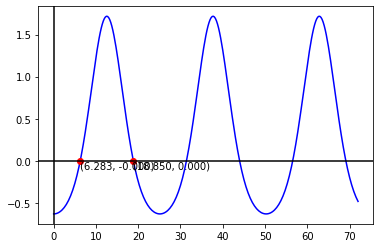

In [242]:
plt.plot(t , corti(t), '-b')
for lo, hi in list(rootsearch(corti, 1, 30, 1000)):
    xmin = secant(corti, lo, hi, tol= 1e-8)
    ymin = corti(xmin)
    ymin = corti(xmin)
    plt.plot(xmin, ymin, 'or')
    plt.text(xmin, ymin, f'({xmin:.3f}, {ymin:.3f})', verticalalignment='top')
    print(f'{xmin:.3f}')


plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')
# plt.axis([-1, 1, -0.1, 1])
plt.show()   
    

In [243]:
T = 18.238 - 6.283
T

11.954999999999998

#### Question 2c <small>[5 pts]</small>

As an alternative to golden section search, gradient descent could have been performed; as an alternative to the secant method, Newton-Raphson could have been used. Both of these alternatives require knowledge of the derivatives of the functions $C(t)$ and/or $M(t)$.

Name two different approaches that you could take *in this particular situation* to determine the required derivatives. Which would you prefer? Motivate your answer.

In [ ]:
# Central derivative
# Backward derivative
# Central derivative is better

### Question 3

As it turns out, the differential equation model can also be solved *analytically* using techniques from calculus. The result is that the exact period of this circadian model equals $T=\pi \sqrt{56}$ hours.

In [185]:
period = np.pi * np.sqrt(56)
period

23.509526717077993

#### Question 3a <small>[5 pts]</small>

In decimal scientific notation, the model's period can be approximated as $T \approx +2.3509526717 \times 10^1$ hours. This floating point number can alternatively be written as `2.3509526717e+1`.

Similarly, express the period in *binary* (not hexadecimal!) *scientific notation* up to approximately 10 binary digits.

In [246]:
import struct
my_num = 2.3509526717e+1
bits = ''.join(bin(byte).replace('0b', '').rjust(8, '0') for byte in struct.pack('!d', my_num))
print(bits)


0100000000110111100000100111000001010111110010011111010000001000


#### Question 3b <small>[10 pts]</small>

The *mean* blood plasma concentrations of cortisol and melatonin can now be determined by integrating the functions $C(t)$ and $M(t)$ over a time interval that spans one full period $T$, and by dividing the answer by $T$ itself.

$$
\overline{f(t)} = \frac{1}{T} \int_0^T f(t) \text{d}t
$$

Use the *(recursive) trapezoidal rule* to determine the model's mean cortisol concentration $\overline{C}$ as well as the mean melatonin concentration $\overline{M}$ to an accuracy of 3 decimals.

In [190]:
def trapezoid(f, a, b, tol=1e-8):
    """df = trapezoid(f, a, b, tol=...).
    Calculates the definite integral of the function f(x)
    from a to b using the recursive trapezoidal rule with
    an absolute tolerance tol (with default 1e-8).
    """
    h = (b - a) # Interval size
    panels = 1 # No. of intervals
    I_old = (f(a)+f(b)) * h/2 
    
    while True:
        h /= 2
        panels *= 2

        I_new = 0.5 * I_old + sum(f(a +i*h) for i in range(1, panels, 2)) * h
        
        
        if abs(I_new - I_old) < tol:
            return I_new
        else:
            I_old = I_new

In [194]:
print(f'{(1/period)*trapezoid(corti, 0, period):.3f}')

0.327


***

## End of this exam

<div class="alert alert-warning">See the instructions at the top of this document for how to submit your answers.</div>

*Success!*